In [333]:
#importing libraries
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [334]:
df=pd.read_csv('stackoverflow_full.csv')

**Introducing noice to data**

In [335]:
import numpy as np
import pandas as pd

# introduce outliers
def introduce_outliers(df, col_name, percentage,range):

    n_rows = df.shape[0]
    n_outliers = int(n_rows * (percentage / 100))
    outlier_indices = np.random.choice(df.index, size=n_outliers, replace=False)
    lower, upper = range
    outlier_values = np.random.randint(lower, upper+1, size=n_outliers)
    df.loc[outlier_indices, col_name] = outlier_values
    return df

# introduce null values in random columns
def introduce_nulls(df, percentage):
    n_rows, n_cols = df.shape
    n_nulls = int(n_rows * (percentage / 100))
    row_indices = np.random.randint(0, n_rows, n_nulls)
    col_indices = np.random.randint(0, n_cols, n_nulls)
    for row, col in zip(row_indices, col_indices):
        df.iat[row, col] = np.nan
    return df

# introduce data format issues in Salary column
def corrupt_salary(df, col_name, percentage):
    n_rows = df.shape[0]
    n_corrupt = int(n_rows * (percentage / 100))
    corrupt_indices = np.random.choice(df.index, size=n_corrupt, replace=False)
    df.loc[corrupt_indices, col_name] = df.loc[corrupt_indices, col_name].apply(lambda x: f"${x}")
    return df

df = introduce_outliers(df, 'YearsCode', 3, range=(100, 200))
df = introduce_outliers(df, 'YearsCodePro', 3, range=(100, 200))
df = introduce_outliers(df, 'PreviousSalary', 3, range=(4000000, 10000000))
df = introduce_nulls(df, 10)
df = corrupt_salary(df, 'PreviousSalary', 15)

##Exploring the dataset##

In [336]:
display(df.head())

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0.0,<35,No,Master,1.0,Man,No,Dev,7.0,4.0,Sweden,51552.0,C++;Python;Git;PostgreSQL,4.0,0.0
1,1.0,<35,No,Undergraduate,1.0,Man,No,Dev,12.0,5.0,Spain,46482.0,NaN,12.0,1.0
2,2.0,<35,No,Master,1.0,Man,No,Dev,15.0,6.0,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7.0,0.0
3,3.0,<35,No,Undergraduate,1.0,Man,No,Dev,9.0,6.0,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13.0,0.0
4,4.0,>35,No,PhD,0.0,Man,No,NotDev,40.0,30.0,Singapore,7039572.0,C++;Python,2.0,0.0


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72967 non-null  float64
 1   Age             73030 non-null  object 
 2   Accessibility   72957 non-null  object 
 3   EdLevel         72932 non-null  object 
 4   Employment      72977 non-null  float64
 5   Gender          72979 non-null  object 
 6   MentalHealth    72987 non-null  object 
 7   MainBranch      72998 non-null  object 
 8   YearsCode       72953 non-null  float64
 9   YearsCodePro    72972 non-null  float64
 10  Country         72980 non-null  object 
 11  PreviousSalary  73019 non-null  object 
 12  HaveWorkedWith  72932 non-null  object 
 13  ComputerSkills  72968 non-null  float64
 14  Employed        72980 non-null  float64
dtypes: float64(6), object(9)
memory usage: 8.4+ MB


In [338]:
df.nunique()

Unnamed: 0        72967
Age                   2
Accessibility         2
EdLevel               5
Employment            2
Gender                3
MentalHealth          2
MainBranch            2
YearsCode           152
YearsCodePro        152
Country             171
PreviousSalary    17140
HaveWorkedWith    69553
ComputerSkills       73
Employed              2
dtype: int64

In [339]:
#checking rows with null values
rows_with_null = df.isnull().sum(axis=1)
print(len(rows_with_null[rows_with_null > 0]))

mis_values = (df.isnull().sum() / len(df)) * 100
print(mis_values)

6989
Unnamed: 0        0.673818
Age               0.588059
Accessibility     0.687430
EdLevel           0.721461
Employment        0.660205
Gender            0.657483
MentalHealth      0.646593
MainBranch        0.631619
YearsCode         0.692875
YearsCodePro      0.667012
Country           0.656122
PreviousSalary    0.603033
HaveWorkedWith    0.721461
ComputerSkills    0.672457
Employed          0.656122
dtype: float64


In [340]:
#Key statistics

df_numerical=['YearsCode','YearsCodePro','ComputerSkills','PreviousSalary']
cat_cols = ['Age', 'Accessibility','EdLevel','Employment','Gender','MentalHealth','MainBranch','Country','HaveWorkedWith','Employed']

#Mean
mean=df[df_numerical].mean()
display(mean)

#Median
median=df[df_numerical].median()
display(median)

#Mode
mode=df[cat_cols].mode()
display(mode)

#min and max
min_values=df[df_numerical].min()
max_values=df[df_numerical].max()
display(min_values)
display(max_values)

#standard deviation
deviation=df[df_numerical].std()
display(deviation)

<ipython-input-340-b74eff7727b6>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean=df[df_numerical].mean()


YearsCode         18.295190
YearsCodePro      13.333676
ComputerSkills    13.430613
dtype: float64

<ipython-input-340-b74eff7727b6>:11: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median=df[df_numerical].median()


YearsCode         12.0
YearsCodePro       7.0
ComputerSkills    13.0
dtype: float64

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,Country,HaveWorkedWith,Employed
0,<35,No,Undergraduate,1.0,Man,No,Dev,United States of America,Python,1.0


<ipython-input-340-b74eff7727b6>:19: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  min_values=df[df_numerical].min()
<ipython-input-340-b74eff7727b6>:20: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  max_values=df[df_numerical].max()


YearsCode         0.0
YearsCodePro      0.0
ComputerSkills    0.0
dtype: float64

YearsCode         200.0
YearsCodePro      200.0
ComputerSkills    107.0
dtype: float64

<ipython-input-340-b74eff7727b6>:25: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  deviation=df[df_numerical].std()


YearsCode         25.482739
YearsCodePro      25.824800
ComputerSkills     7.060253
dtype: float64

##Data Cleaning and Preprocessing##

In [341]:
#Removing index column from the data set
df = df.drop('Unnamed: 0', axis=1)

In [342]:
# Cleaning salary column by removing string values and replacing $ with empty string whereever present
df['PreviousSalary'] = df['PreviousSalary'].apply(lambda x: str(x).replace('$', '')).astype(float)

In [343]:
# Removing rows with null values in specific columns
df = df.dropna(subset=['Employed', 'ComputerSkills', 'HaveWorkedWith'])

In [344]:
# Replacing null values with the median for specific columns
numerical_cols = ['YearsCode', 'YearsCodePro', 'PreviousSalary']
for i in numerical_cols:
    median_value = df[i].median()
    df[i] = df[i].fillna(median_value)

# Replacing null values with the mode for specific columns
catergrical_cols = ['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender', 'MentalHealth', 'MainBranch', 'Country']
for i in catergrical_cols:
    mode_value = df[i].mode().iloc[0]
    df[i] = df[i].fillna(mode_value)

# Checking rows with null values
rows_with_null = df.isnull().sum(axis=1)
print(len(rows_with_null[rows_with_null > 0]))

0


In [345]:
#removing countires with very small sample size
country_counts = df.groupby('Country').transform('size')
filtered_data = df[country_counts >= 100]
filtered_countries = filtered_data['Country'].unique()
print(filtered_countries)
df = df[df['Country'].isin(filtered_countries)]

['Sweden' 'Germany' 'Canada' 'Singapore' 'France' 'Switzerland'
 'United Kingdom of Great Britain and Northern Ireland'
 'Russian Federation' 'Israel' 'Turkey' 'United States of America'
 'Brazil' 'Bulgaria' 'Greece' 'Italy' 'Spain' 'Netherlands' 'Poland'
 'Hungary' 'Pakistan' 'Nigeria' 'Bangladesh' 'Viet Nam' 'Romania'
 'Sri Lanka' 'India' 'Lithuania' 'Ukraine' 'Croatia' 'Georgia' 'Denmark'
 'Ireland' 'Egypt' 'Colombia' 'Australia' 'Chile' 'Indonesia'
 'Iran, Islamic Republic of...' 'Portugal' 'Slovakia' 'Finland'
 'Hong Kong (S.A.R.)' 'Argentina' 'Peru' 'Japan' 'Belgium'
 'United Arab Emirates' 'Austria' 'South Africa' 'Serbia' 'Malaysia'
 'Czech Republic' 'Belarus' 'Slovenia' 'Kenya' 'Uruguay' 'Norway' 'China'
 'Mexico' 'Venezuela, Bolivarian Republic of...' 'Dominican Republic'
 'Ecuador' 'Taiwan' 'South Korea' 'Morocco' 'Nepal' 'Estonia' 'Latvia'
 'Philippines' 'Thailand' 'New Zealand']
69735


In [346]:
#number of rows is dataset after filtering
print(len(df))

69735


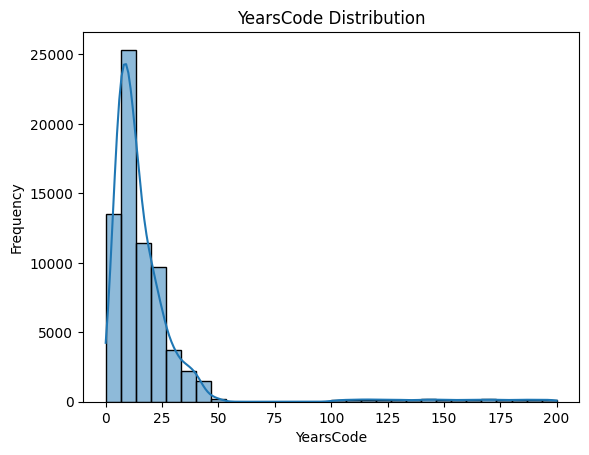

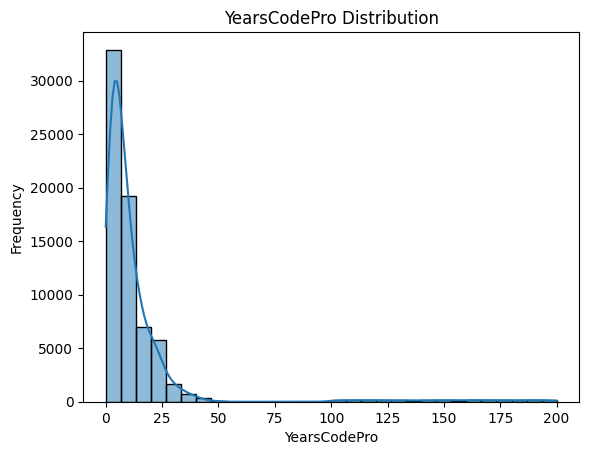

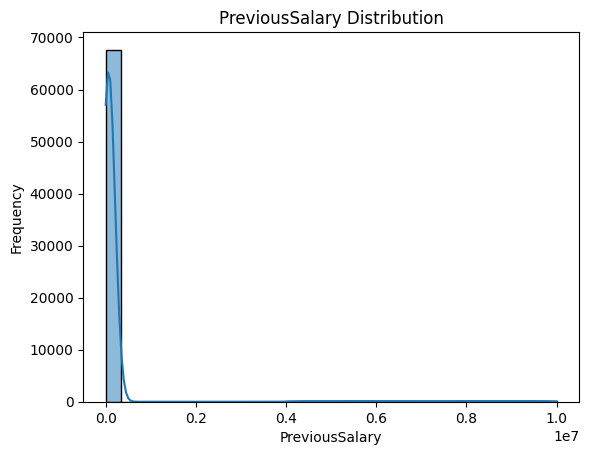

In [347]:
#checking outliers
for col in numerical_cols:
  sns.histplot(df[col], bins=30, kde=True)
  plt.title(col +" Distribution")
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

#removing outliers using IQR
for i in numerical_cols:
    diff = df[i].quantile(0.75) - df[i].quantile(0.25)

    llimit = df[i].quantile(0.25) - (1.5 * diff)
    ulimit = df[i].quantile(0.75) + (1.5 * diff)

    # Replace outliers with mdeian
    median_value = df[i].median()
    df[i] = df.apply(lambda x: median_value if (x[i] < llimit) or (x[i] > ulimit) else x[i], axis=1)

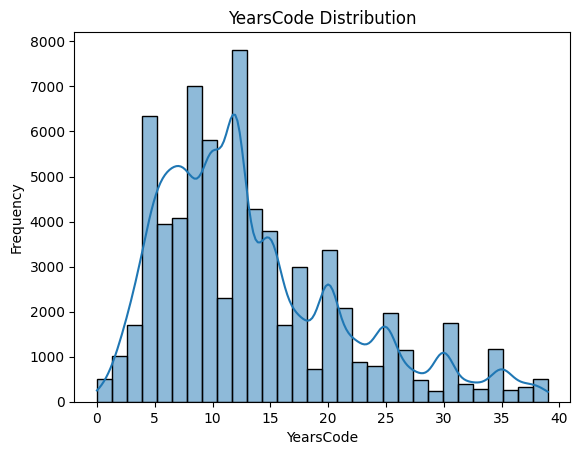

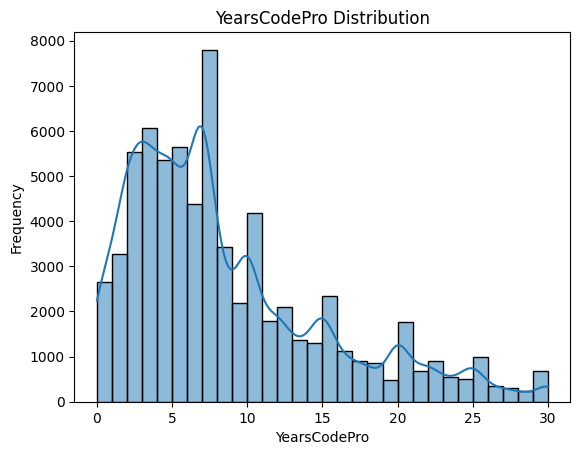

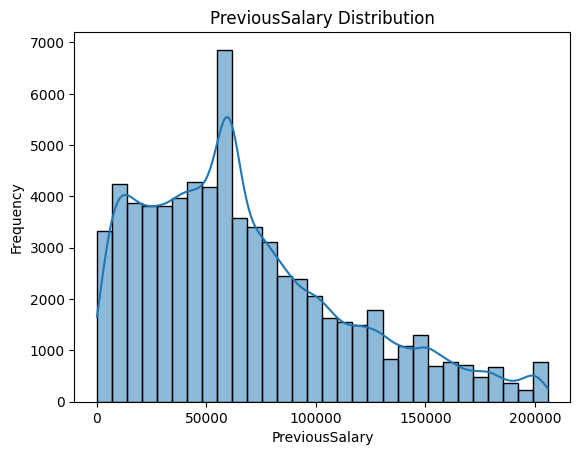

In [311]:

#checking outliers after cleaning
for col in numerical_cols:
  sns.histplot(df[col], bins=30, kde=True)
  plt.title(col +" Distribution")
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [348]:
#Handling string sensitvity in HaveWorkedWith column
df['HaveWorkedWith'] = df['HaveWorkedWith'].str.lower()
df_cleaned=df

In [349]:
#Creating new binary columns for each skills form the HaveWorkedWith column
skills_set = set()
for skill_list in df_cleaned['HaveWorkedWith']:
    skill_list = skill_list.split(';')
    skills_set.update(skill_list)

skills_df = df_cleaned['HaveWorkedWith'].str.get_dummies(sep=';')

df_cleaned_transormed= pd.concat([df_cleaned, skills_df], axis=1)
display(df_cleaned_transormed.head(5))

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,...,symfony,terraform,typescript,unity 3d,unreal engine,vba,vmware,vue.js,xamarin,yarn
0,<35,No,Master,1.0,Man,No,Dev,7.0,4.0,Sweden,...,0,0,0,0,0,0,0,0,0,0
2,<35,No,Master,1.0,Man,No,Dev,15.0,6.0,Germany,...,0,0,0,0,0,0,0,0,0,0
3,<35,No,Undergraduate,1.0,Man,No,Dev,9.0,6.0,Canada,...,0,0,0,0,0,0,0,0,0,0
4,>35,No,PhD,0.0,Man,No,NotDev,12.0,30.0,Singapore,...,0,0,0,0,0,0,0,0,0,0
5,<35,No,Master,1.0,Man,No,Dev,9.0,2.0,France,...,0,0,0,0,0,0,0,0,0,0


In [351]:
#Scaling numerical columns using min-max scaler
num_cols = ['YearsCode', 'YearsCodePro', 'PreviousSalary','ComputerSkills']
for i in num_cols:
    min_value=df[i].min()
    max_value=df[i].max()
    df_cleaned_transormed[i]=(df_cleaned_transormed[i]-min_value)/(max_value-min_value)

In [352]:
#encoding catergorical data using get_dummies
df_cleaned_transormed = pd.get_dummies(df_cleaned_transormed, columns=['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender', 'MentalHealth', 'MainBranch', 'Country','Employed'], prefix=['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender', 'MentalHealth', 'MainBranch', 'Country','Employed'])

In [353]:
rows, cols = df_cleaned_transormed.shape
print(rows," ",cols)

69735   211


##Exploratory Data Analysis##

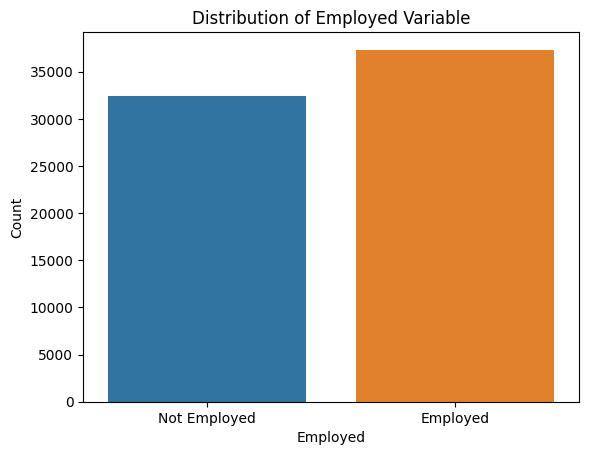

In [354]:
#EDA 1: Check the Distribution of the Target Variable'Employed'
sns.countplot(x='Employed', data=df_cleaned)
plt.title('Distribution of Employed Variable')
plt.xlabel('Employed')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Employed', 'Employed'])
plt.show()

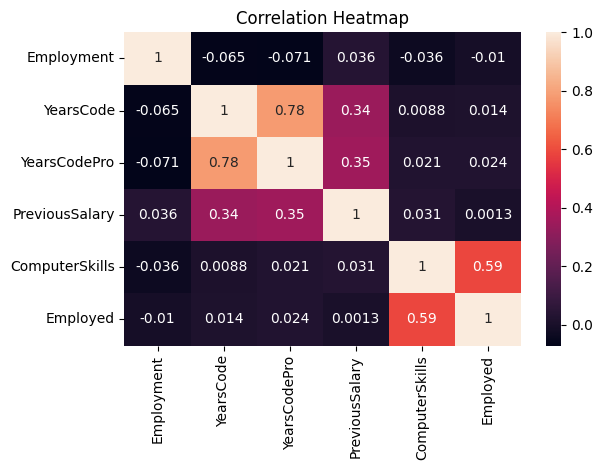

In [355]:
#EDA 2: Correlation heatmap
corr = df_cleaned.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


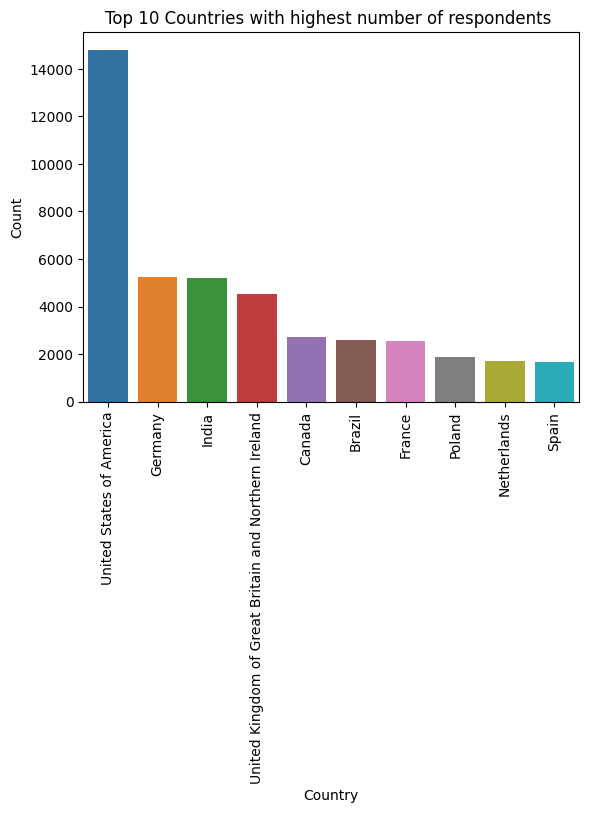

In [356]:
# EDA 3: Identify Most Common Countries
top_countries = df_cleaned['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with highest number of respondents ')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

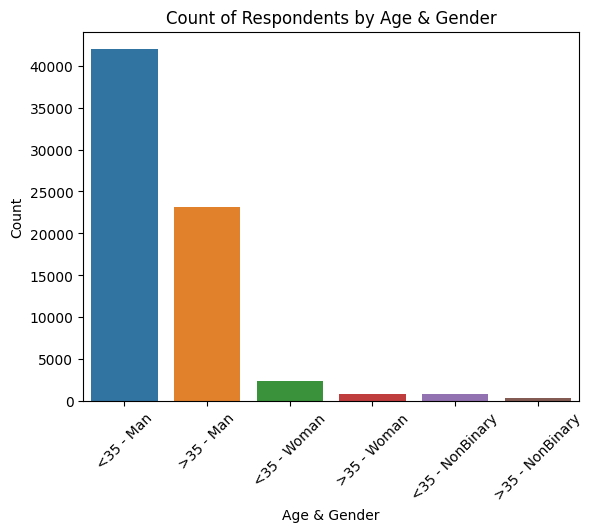

In [357]:
#EDA 4: Analyze Age and gender Distribution
df_cleaned['Age&Gender'] = df_cleaned['Age'] + " - " + df_cleaned['Gender']
sns.countplot(x='Age&Gender', data=df_cleaned, order=df_cleaned['Age&Gender'].value_counts().index)

plt.title('Count of Respondents by Age & Gender')
plt.xlabel('Age & Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

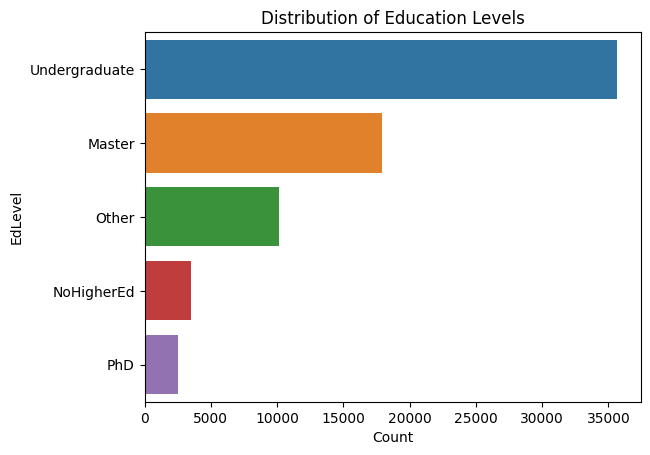

In [358]:
#EDA 5: Explore Education Level

sns.countplot(y='EdLevel', data=df_cleaned, order=df['EdLevel'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Count')
plt.ylabel('EdLevel')
plt.show()

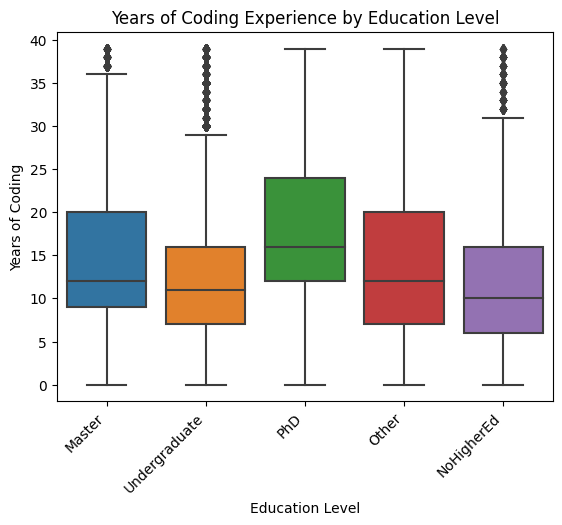

In [368]:
#EDA 6 Years of Coding Experience by Education Level

sns.boxplot(x="EdLevel", y="YearsCode", data=df_cleaned)

plt.title('Years of Coding Experience by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Years of Coding')
plt.xticks(rotation=45, ha='right')
plt.show()

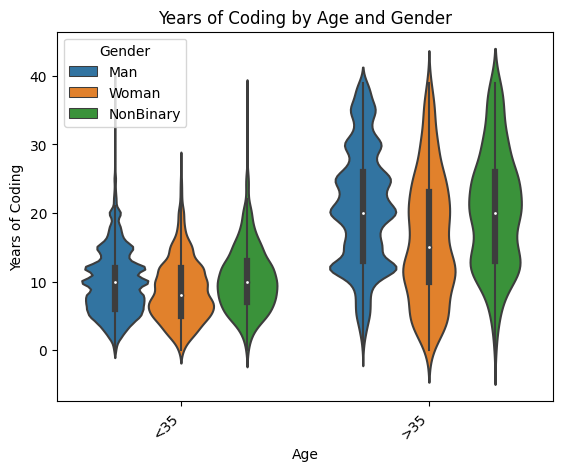

In [367]:
#EDA7 Years of Coding by Age and Gender

sns.violinplot(x='Age', y='YearsCode', hue='Gender', data=df_cleaned)

plt.title('Years of Coding by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Years of Coding')
plt.xticks(rotation=45, ha='right')
plt.show()

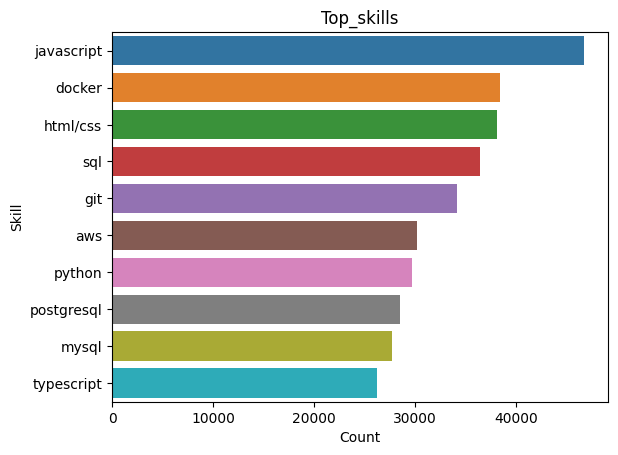

In [361]:
#EDA 8: top skills
skills = df_cleaned['HaveWorkedWith'].str.split(';', expand=True).stack().value_counts()
top_skills = skills.head(10)
sns.barplot(x=top_skills.values, y=top_skills.index)
plt.title('Top_skills')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()

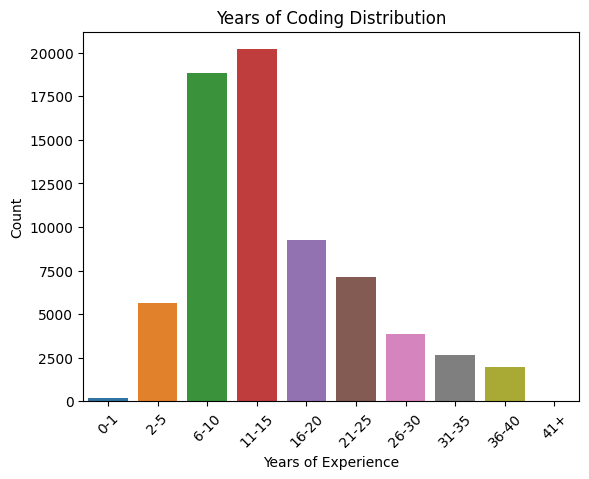

In [363]:

# EDA 9: Experience Analysis

bins = [0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 100]
labels = ['0-1', '2-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41+']

df_cleaned['YearsCode'] = pd.to_numeric(df_cleaned['YearsCode'])

df_cleaned['Exp_Binned'] = pd.cut(df_cleaned['YearsCode'], bins=bins, labels=labels, right=False)

sns.countplot(x='Exp_Binned', data=df_cleaned, order=labels)
plt.title('Years of Coding Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

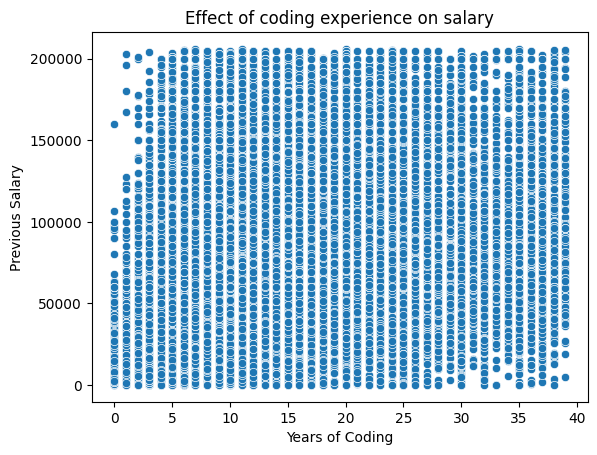

In [364]:
#EDA 10: Salary Analysis based on Years of coding

sns.scatterplot(x='YearsCode', y='PreviousSalary', data=df_cleaned)

plt.title('Effect of coding experience on salary')
plt.xlabel('Years of Coding')
plt.ylabel('Previous Salary')
plt.show()


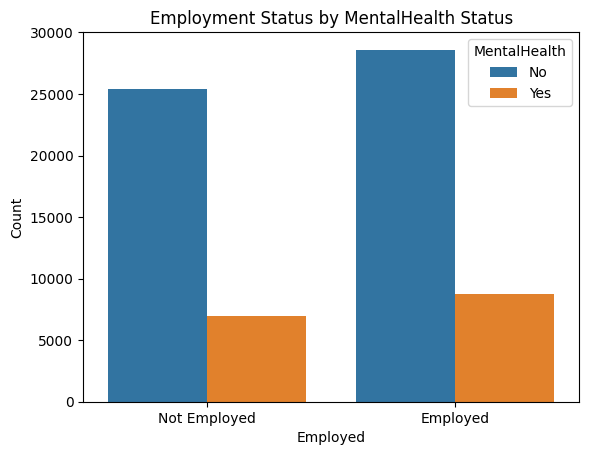

In [365]:
#EDA 11 Mental health effect on Employability.

sns.countplot(x='Employed', hue='MentalHealth', data=df_cleaned)

plt.title('Employment Status by MentalHealth Status')
plt.xlabel('Employed')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Employed', 'Employed'])
plt.show()


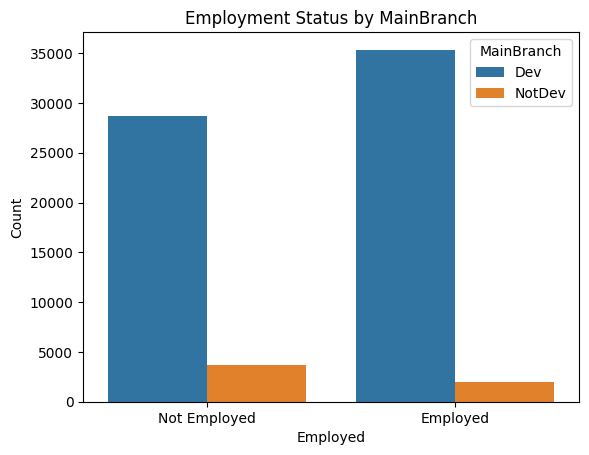

In [366]:
#EDA 12 main branch effect on Employability

sns.countplot(x='Employed', hue='MainBranch', data=df_cleaned)

plt.title('Employment Status by MainBranch')
plt.xlabel('Employed')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Employed', 'Employed'])
plt.show()